# Fitting linear models

## Summary of results
In general, we see **high bias** in these systems, while the training and testing errors converge. This indicates that our model is not complex enough to capture the variance in the data. At best, we are explaining around 5% of the variance.

This could be due to several reasons:
* The time horizon we are looking at is incorrect. We arbitrarily decided on 30 days, but maybe 2 weeks or 6 months is better
* The data is highly nonlinear and even 2nd order interactions can't capture it

# Importing libraries and data

In [1]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import scipy
import psycopg2
con = psycopg2.connect(database='codeforces', user='Joy')
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.rcParams['figure.facecolor'] = 'white'


/usr/local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [174]:
train = pd.read_csv('training_linear_regression.csv', engine='c')
train.dropna(inplace=True, axis=0)

Y = train.rating_change
X = train.drop(['handle', 'rating_change'], axis=1)
X['bias'] = 1

#x = X.loc[0:100,:]
#y = Y.loc[0:100]

# Null model

In [36]:
# null model

ss_tot = np.var(Y) * len(Y)

ybar = np.mean(Y)
ss_tot = np.sum((Y-ybar)**2)
ss_res = np.sum((Y - 0)**2)

1 - ss_res / ss_tot

-3.6174269855138164e-06

In [37]:
# fit a horizontal line
results = sm.OLS(Y, [1]*len(Y)).fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:          rating_change   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Tue, 06 Jun 2017   Prob (F-statistic):                nan
Time:                        10:55:12   Log-Likelihood:            -3.8858e+06
No. Observations:              673282   AIC:                         7.772e+06
Df Residuals:                  673281   BIC:                         7.772e+06
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1477      0.095     -1.561      0.1

/usr/local/lib/python2.7/site-packages/statsmodels/regression/linear_model.py:1396: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


# First order model

In [38]:
results = sm.OLS(Y, X).fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:          rating_change   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     2512.
Date:                Tue, 06 Jun 2017   Prob (F-statistic):               0.00
Time:                        10:56:28   Log-Likelihood:            -3.8698e+06
No. Observations:              673282   AIC:                         7.740e+06
Df Residuals:                  673268   BIC:                         7.740e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
n_contest             0.8804      0.02

In [83]:
results = sm.OLS(Y, X.rating_diff_mean).fit()
print results.summary()


                            OLS Regression Results                            
Dep. Variable:          rating_change   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                 2.029e+04
Date:                Tue, 06 Jun 2017   Prob (F-statistic):               0.00
Time:                        11:42:15   Log-Likelihood:            -3.8758e+06
No. Observations:              673282   AIC:                         7.752e+06
Df Residuals:                  673281   BIC:                         7.752e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
rating_diff_mean     0.0575      0.000  

## try sectioning users
this doesn't work very well

In [186]:
low = 2000
high= 2200

train = pd.read_csv('training_linear_regression.csv', engine='c')
train.dropna(inplace=True, axis=0)

X = train
X = X.loc[np.logical_and(X.user_rating >= low, X.user_rating <= high)]
Y = X.rating_change

X.drop(['handle', 'rating_change'], axis=1, inplace=True)
X['bias'] = 1


results = sm.OLS(Y, X).fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:          rating_change   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     14.04
Date:                Wed, 07 Jun 2017   Prob (F-statistic):           7.34e-32
Time:                        08:12:14   Log-Likelihood:            -1.2694e+05
No. Observations:               22270   AIC:                         2.539e+05
Df Residuals:                   22256   BIC:                         2.540e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
n_contest            -0.0537      0.09

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


## Distribution of residuals

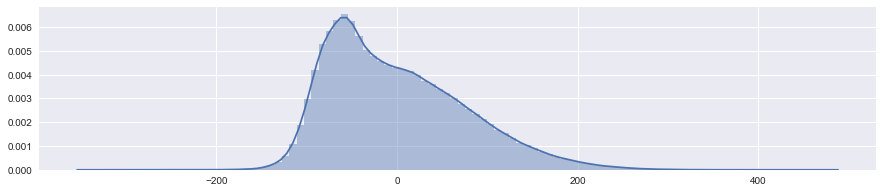

In [39]:
plt.rcParams['figure.figsize'] = (15.0, 3.0)
sns.distplot(results.resid, bins=100)

## Model shows high bias

In [40]:
# shuffle rows of x and y
Xshuff, Yshuff = shuffle(X, Y)

stepsize = 10000
steps = range(stepsize, len(Y), stepsize)
rsq_test1 = []
rsq_train1 = []
for size in steps:
    # split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(Xshuff[0:size], Yshuff[0:size], test_size=0.33, random_state=42)

    results = sm.OLS(y_train, X_train).fit()
    y_pred = results.predict(X_test)
    rsq_test1.append(1 - sum((y_pred - y_test)**2) / sum((y_test - np.mean(y_test))**2))
    rsq_train1.append(1 - sum((results.predict() - y_train)**2) / sum((y_train - np.mean(y_train))**2))

(0.94, 1)

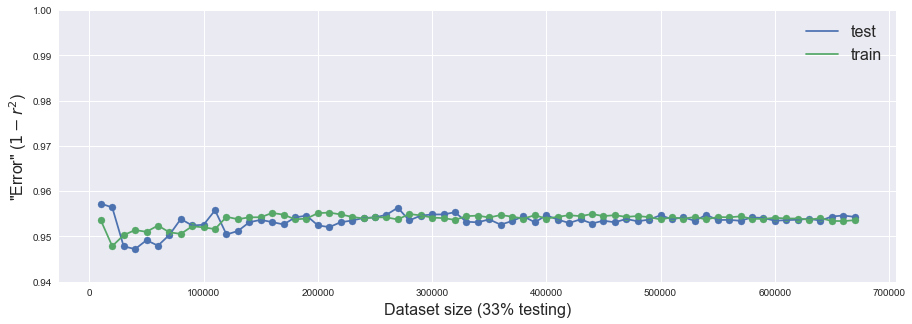

In [41]:
plt.rcParams['figure.figsize'] = (15.0, 5.0)
plt.plot(steps, 1-np.array(rsq_test1))
plt.scatter(steps, 1-np.array(rsq_test1))
plt.plot(steps, 1-np.array(rsq_train1))
plt.scatter(steps, 1-np.array(rsq_train1))
plt.legend(['test', 'train'], fontsize=16)
plt.xlabel('Dataset size (33% testing)', fontsize=16)
plt.ylabel('"Error" ($1-r^2$)', fontsize=16)
plt.ylim([0.94, 1])

# Secondary orders

In [104]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

#X.drop('bias', axis=1, inplace=True)

scaler = MinMaxScaler(feature_range=(0, 1))
Xmat = scaler.fit_transform(X)

scaler = MinMaxScaler(feature_range=(-1, 1))
Ymat = scaler.fit_transform(Y)

itn = PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
X2 = itn.fit_transform(Xmat)

results = sm.OLS(Ymat, X2).fit()
print results.summary()

/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     421.1
Date:                Tue, 06 Jun 2017   Prob (F-statistic):               0.00
Time:                        11:46:24   Log-Likelihood:             2.3661e+05
No. Observations:              673282   AIC:                        -4.730e+05
Df Residuals:                  673177   BIC:                        -4.718e+05
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7150      0.027    -62.572      0.0

In [110]:
colnames = itn.get_feature_names(input_features=X.columns)
pvals = results.pvalues
tvals = results.tvalues

regdat = pd.DataFrame({
    'var' : colnames,
    'pvals' : pvals,
    'tvals' : tvals
})
regdat.sort_values('tvals')

,pvals,tvals,var
0,0.000000e+00,-62.571674,1
94,0.000000e+00,-40.652399,rating_diff_mean user_rating
87,1.158428e-299,-37.018520,problems_solved time_between_mean
26,2.862377e-124,-23.714681,n_contest user_rating
90,5.345750e-86,-19.656802,rating_diff_mean^2
95,1.980124e-80,-18.994712,rating_diff_std^2
6,7.014141e-68,-17.411262,n_wrong_mean
104,5.834447e-67,-17.289512,user_rating^2
22,5.223129e-48,-14.558790,n_contest rating_diff_mean
8,4.050905e-46,-14.258155,problems_solved


In [63]:
# understand what the values are
#pvals = results.pvalues.sort_values()

array([  0.00000000e+000,   0.00000000e+000,   1.15842820e-299,
         2.60267151e-265,   6.09228428e-150,   2.86237737e-124,
         2.56275787e-118,   3.19878694e-087,   5.34575033e-086,
         1.98012426e-080,   3.76512769e-076,   7.01414098e-068,
         5.83444695e-067,   5.22312927e-048,   1.74677743e-046,
         4.05090526e-046,   2.39454880e-043,   2.93560649e-032,
         1.35547975e-031,   5.83907645e-031,   1.19375122e-029,
         4.73452578e-022,   4.82823358e-021,   1.68209855e-016,
         1.50353647e-015,   6.81155846e-015,   4.52832983e-012,
         1.13703265e-010,   6.16457089e-010,   3.09807155e-008,
         1.25041122e-007,   1.25927734e-007,   4.31001876e-007,
         8.76015902e-007,   1.60245362e-006,   2.59953724e-006,
         1.26330779e-005,   6.24779629e-005,   1.40772310e-004,
         1.39942153e-003,   2.08229564e-003,   3.52015461e-003,
         6.34342506e-003,   6.38664360e-003,   7.71458540e-003,
         9.99529974e-003,   1.27365103e-

In [43]:
# shuffle rows of x and y
Xshuff, Yshuff = shuffle(X2, Y)

stepsize = 10000
steps = range(stepsize, len(Y), stepsize)
rsq_test2 = []
rsq_train2 = []
for size in steps:
    # split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(Xshuff[0:size], Yshuff[0:size], test_size=0.33, random_state=42)

    results = sm.OLS(y_train, X_train).fit()
    y_pred = results.predict(X_test)
    rsq_test2.append(1 - sum((y_pred - y_test)**2) / sum((y_test - np.mean(y_test))**2))
    rsq_train2.append(1 - sum((results.predict() - y_train)**2) / sum((y_train - np.mean(y_train))**2))

## even with secondary orders, we still see high bias

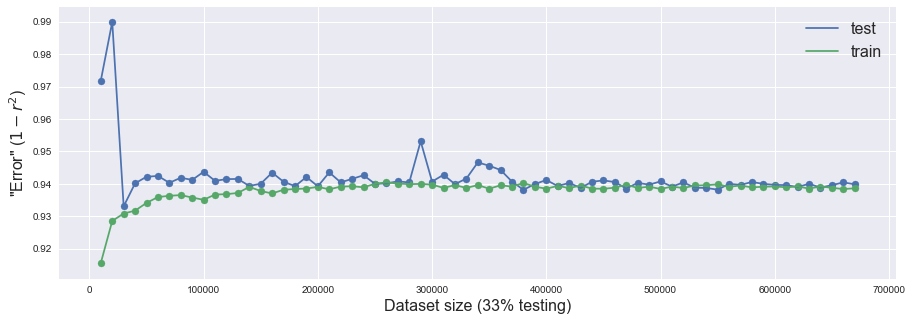

In [46]:
plt.rcParams['figure.figsize'] = (15.0, 5.0)
plt.plot(steps, 1-np.array(rsq_test2))
plt.scatter(steps, 1-np.array(rsq_test2))
plt.plot(steps, 1-np.array(rsq_train2))
plt.scatter(steps, 1-np.array(rsq_train2))
plt.legend(['test', 'train'], fontsize=16)
plt.xlabel('Dataset size (33% testing)', fontsize=16)
plt.ylabel('"Error" ($1-r^2$)', fontsize=16)
#plt.ylim([0.92, 1])

#  Tertiary interactions

In [7]:
from sklearn.preprocessing import PolynomialFeatures
itn = PolynomialFeatures(degree=3, interaction_only=False, include_bias=True)
X3 = itn.fit_transform(X)

results = sm.OLS(Y, X3).fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:          rating_change   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     52.52
Date:                Tue, 06 Jun 2017   Prob (F-statistic):               0.00
Time:                        01:51:46   Log-Likelihood:            -1.4705e+06
No. Observations:              255201   AIC:                         2.941e+06
Df Residuals:                  254965   BIC:                         2.944e+06
Df Model:                         235                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.425e-06   1.97e-07     12.291      0.0

In [33]:
X.columns[1]

'n_harder'

In [17]:
names = np.array(itn.get_feature_names())
signames = names[results.pvalues.sort_values() < 0.001]

for s in signames:
    #s = s.replace('x', '')
    print s.split(' ')

['1']
['x0']
['x1']
['x2']
['x3']
['x4']
['x5']
['x6']
['x7']
['x8']
['x9']
['x10']
['x11']
['x12']
['x13']
['x0^2']
['x0', 'x1']
['x0', 'x2']
['x0', 'x3']
['x0', 'x4']
['x0', 'x5']
['x0', 'x6']
['x0', 'x7']
['x0', 'x8']
['x0', 'x9']
['x0', 'x10']
['x0', 'x11']
['x0', 'x12']
['x0', 'x13']
['x1^2']
['x1', 'x2']
['x1', 'x3']
['x1', 'x4']
['x1', 'x5']
['x1', 'x6']
['x1', 'x7']
['x1', 'x8']
['x1', 'x9']
['x1', 'x10']
['x1', 'x11']
['x1', 'x12']
['x1', 'x13']
['x2^2']
['x2', 'x3']
['x2', 'x4']
['x2', 'x5']
['x2', 'x6']
['x2', 'x7']
['x2', 'x8']
['x2', 'x9']
['x2', 'x10']
['x2', 'x11']
['x2', 'x12']
['x2', 'x13']
['x3^2']
['x3', 'x4']
['x3', 'x5']


# Data smoothing

Apply the Savitzky-Golay filter with 1st order polynomials to smooth the user ratings

https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter

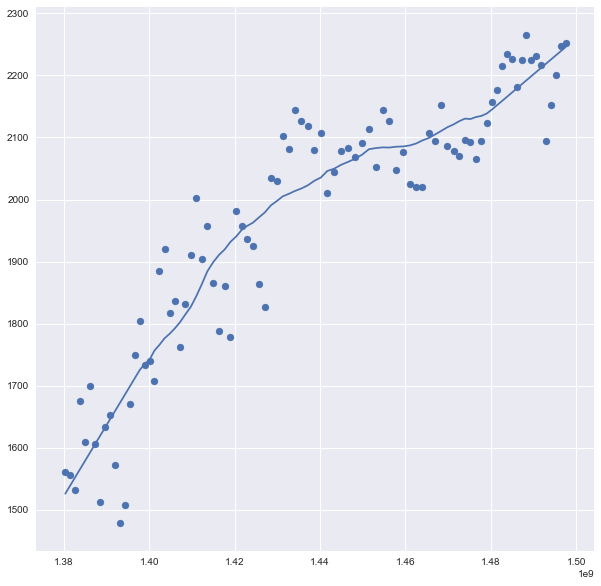

In [360]:
user = 'chenmark'
df = pd.read_sql("select oldrating, newrating, ratingupdatetimeseconds from user_rating where handle = '%s' order by ratingupdatetimeseconds" % user, con)

window = df.shape[0]/3
window += ((window%2) == 0)

sfilter = scipy.signal.savgol_filter(df.loc[:, ['newrating', 'ratingupdatetimeseconds']], window, polyorder=1, axis=0)

smooth_rating, time = zip(*sfilter)

plt.plot(time, smooth_rating)
plt.scatter(time, df.newrating)

##  Reload the data
The interpolation works reasonably well, so let's reload the data

In [3]:
train = pd.read_csv('training_linear_regression_smooth.csv', engine='c')
train.dropna(inplace=True, axis=0)

In [140]:
train.head()

,*special,2-sat,binary search,bitmasks,brute force,chinese remainder theorem,combinatorics,constructive algorithms,contestid,contesttime,...,string suffix structures,strings,ternary search,time_between_mean,time_between_std,trees,two pointers,user_rating,user_rating_smooth,handle
0,0,0,0,1,0,0,0,1,10,1271346469,...,0,1,0,284575.500000,489396.152304,0,0,1764,2053.054666,tourist
1,0,0,0,0,1,0,0,0,101,1312391097,...,0,1,0,21866.800000,32724.915361,0,0,2610,2584.674419,tourist
2,0,0,0,0,1,0,0,0,105,1313248099,...,0,1,0,185630.444444,513802.117518,1,0,2609,2601.325581,tourist
3,0,0,0,0,0,0,0,0,107,1314112086,...,0,0,1,125158.363636,271834.408774,1,0,2604,2615.767442,tourist
4,0,0,0,0,0,0,0,0,109,1314633737,...,0,0,1,115089.133333,245626.064435,1,0,2613,2630.116279,tourist


## OLS on smoothed data
The problem tag columns were not very helpful, so drop those for now.

Our overall $r^2$ is only a bit better than before but the interesting thing is now, sectioning users actually gives us double digit $r^2$ values!

If the LSTM doesn't work, we could use tree + OLS with few parameters. This will avoid overfitting.

In [256]:
lows = [0   , 1100, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1700, 1800, 1900, 2000, 2100]
highs= [1100, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1700, 1800, 1900, 2000, 2100, 2500]

contr_all = []
contr_rating = []
contr_norating = []

for low, high in zip(lows, highs):
    X = train

    # drop users who are tanking on purpose
    drop_users = set(['Hedgehogy', 'errorerror', 'Mhammad1', 'NelsonMondialu'])
    X.is_copy = False
    X.drop(X.index[X.handle.apply(lambda x: x in drop_users)], inplace=True)

    X = X.loc[np.logical_and(X.user_rating_smooth >= low, X.user_rating_smooth <= high)]

    # select features to use
    Y = X.rating_change_smooth
    #print X.columns
    X = X[['user_rating_smooth', 'rating_diff_mean', 'n_harder', 'n_wrong_mean', 'rating_diff_std', 'n_contest']] #, 'dp', 'trees','implementation'

    results_rating_only = sm.OLS(Y.values, X.user_rating_smooth).fit()
    results = sm.OLS(Y.values, X).fit()
    X.drop('user_rating_smooth', inplace=True, axis=1)
    results_norating = sm.OLS(Y.values, X).fit()
    
    contr_all.append(results.rsquared)
    contr_rating.append(results_rating_only.rsquared)
    contr_norating.append(results_norating.rsquared)

    print "(%4d, %4d), %6d entries, ---------------> %f, %f" %(low, high, X.shape[0], results.rsquared, results_rating_only.rsquared)
    #print results.summary()

(   0, 1100),  25497 entries, ---------------> 0.222519, 0.192049
(1100, 1200),  34926 entries, ---------------> 0.211456, 0.153201
(1200, 1250),  28731 entries, ---------------> 0.180682, 0.115887
(1250, 1300),  36721 entries, ---------------> 0.159152, 0.083758
(1300, 1350),  45635 entries, ---------------> 0.143236, 0.051720
(1350, 1400),  47476 entries, ---------------> 0.028121, 0.000027
(1400, 1450),  48881 entries, ---------------> 0.045742, 0.043955
(1450, 1500),  49271 entries, ---------------> 0.106731, 0.103727
(1500, 1550),  49215 entries, ---------------> 0.151578, 0.147026
(1550, 1600),  48395 entries, ---------------> 0.172955, 0.167535
(1600, 1700),  78293 entries, ---------------> 0.235851, 0.231393
(1700, 1800),  46327 entries, ---------------> 0.313544, 0.305327
(1800, 1900),  31261 entries, ---------------> 0.332108, 0.321861
(1900, 2000),  20600 entries, ---------------> 0.316995, 0.310646
(2000, 2100),  12768 entries, ---------------> 0.317726, 0.312893
(2100, 250

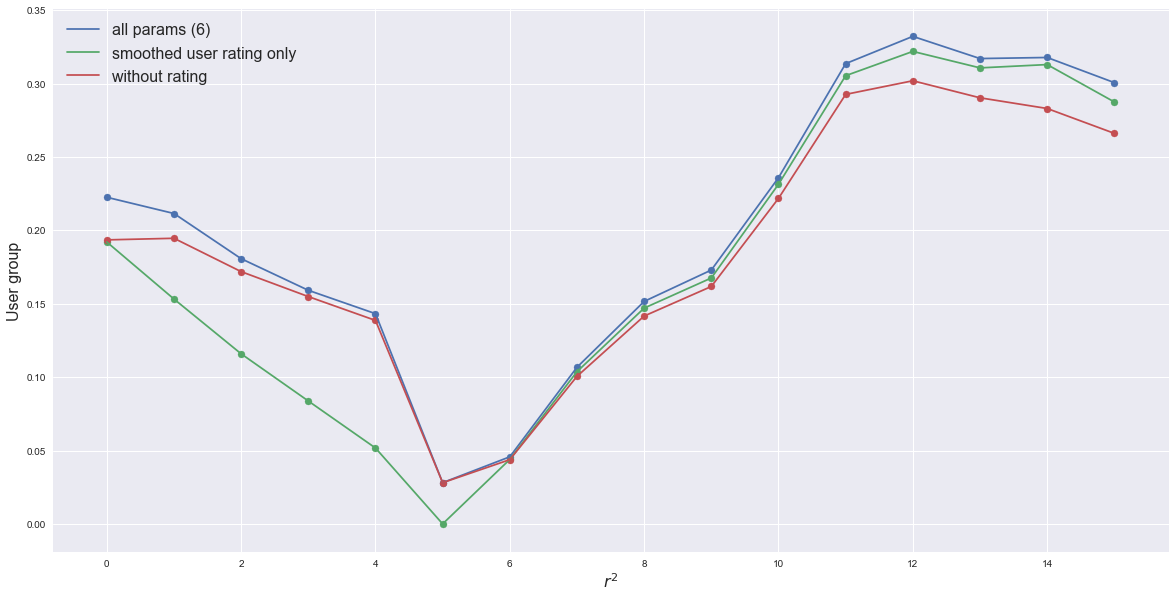

In [259]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

plt.plot   (range(len(lows)), contr_all)
plt.scatter(range(len(lows)), contr_all)
plt.plot   (range(len(lows)), contr_rating)
plt.scatter(range(len(lows)), contr_rating)
plt.plot   (range(len(lows)), contr_norating)
plt.scatter(range(len(lows)), contr_norating)

plt.xlabel('$r^2$', fontsize=16)
plt.ylabel('User group', fontsize=16)
plt.legend(['all params (6)', 'smoothed user rating only', 'without rating'], fontsize=16)

## How much information is "leaking" backwards?

In [20]:
# Smoothing might introduce information into current state --> see autocorrelations

lows = [0   , 1100, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1700, 1800, 1900, 2000, 2100]
highs= [1100, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1700, 1800, 1900, 2000, 2100, 2500]

contr_all = []
contr_rating = []
contr_norating = []

#for low, high in zip(lows, highs):
#X = train
#
## drop users who are tanking on purpose
#drop_users = set(['Hedgehogy', 'errorerror', 'Mhammad1', 'NelsonMondialu'])
#X.is_copy = False
#X.drop(X.index[X.handle.apply(lambda x: x in drop_users)], inplace=True)
#
Xg = train.groupby('handle')
X = []
for k, v in Xg:
    v.is_copy=False
    v.sort_values('contesttime', inplace=True)
    v['last_change'] = np.roll(v.rating_change_smooth, 1)
    v.drop(v.index[0], axis=0, inplace=True)
    X.append(v)
X = pd.concat(X)
#    X = X.loc[np.logical_and(X.user_rating_smooth >= low, X.user_rating_smooth <= high)]
#
#    # select features to use
#    X.drop(X.index[0], inplace = True)
#    Y = X.rating_change_smooth
#    #print X.columns
#    X = X[['user_rating_smooth', 'rating_diff_mean', 'n_harder', 'n_wrong_mean', 'rating_diff_std', 'n_contest']] #, 'dp', 'trees','implementation'
#
#    results_rating_only = sm.OLS(Y.values, X.user_rating_smooth).fit()
#    results = sm.OLS(Y.values, X).fit()
#    X.drop('user_rating_smooth', inplace=True, axis=1)
#    results_norating = sm.OLS(Y.values, X).fit()
#    
#    contr_all.append(results.rsquared)
#    contr_rating.append(results_rating_only.rsquared)
#    contr_norating.append(results_norating.rsquared)
#
#    print "(%4d, %4d), %6d entries, ---------------> %f, %f" %(low, high, X.shape[0], results.rsquared, results_rating_only.rsquared)
#    #print results.summary()
#

#  ISSUE: LOOK-AHEAD BIAS

In [18]:
test = sm.OLS(X.rating_change_smooth, X.last_change).fit()
print test.summary()

                             OLS Regression Results                             
Dep. Variable:     rating_change_smooth   R-squared:                       0.584
Model:                              OLS   Adj. R-squared:                  0.584
Method:                   Least Squares   F-statistic:                 8.275e+05
Date:                  Wed, 07 Jun 2017   Prob (F-statistic):               0.00
Time:                          08:58:33   Log-Likelihood:            -2.4349e+06
No. Observations:                590100   AIC:                         4.870e+06
Df Residuals:                    590099   BIC:                         4.870e+06
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
last_change     0.7350      0.

In [19]:
x = ['user_rating_smooth', 'rating_diff_mean', 'n_harder', 'n_wrong_mean', 'rating_diff_std', 'n_contest', 'last_change']

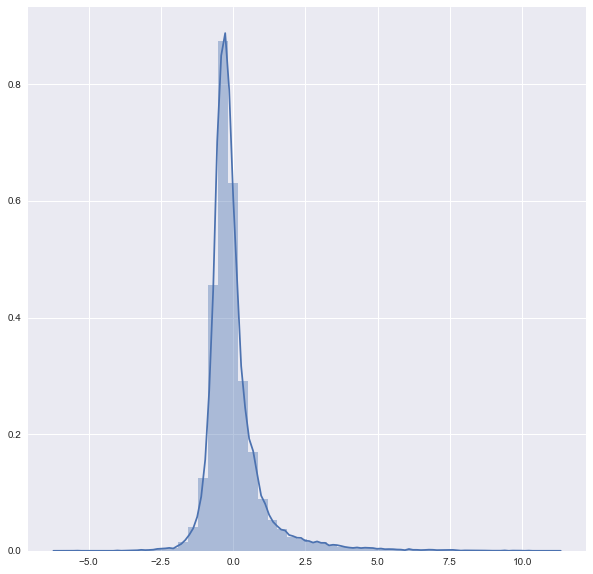

In [219]:
sns.distplot(results.resid_pearson)

In [129]:
results = sm.OLS(Y.values, [0]*len(Y)).fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 07 Jun 2017   Prob (F-statistic):                nan
Time:                        03:00:05   Log-Likelihood:            -1.0143e+05
No. Observations:               22506   AIC:                         2.029e+05
Df Residuals:                   22506   BIC:                         2.029e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        n

In [133]:
from tensorflow.contrib import keras